In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('C:/Users/shahr/OneDrive/Desktop/NEXUS INFO/dataset for project 3/train.csv', encoding='latin1', nrows=100000)

In [ ]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
sentiment_mapping = {
    'neutral': 0,
    'negative':-1,
    'positive':1
}


df['sentiment'] = df['sentiment'].map(sentiment_mapping)

In [ ]:
df = df[['sentiment', 'selected_text', 'text']]
df.drop(['selected_text'], axis=1, inplace=True)

In [ ]:
df.head(10)

,sentiment,text
0,0,"I`d have responded, if I were going"
1,-1,Sooo SAD I will miss you here in San Diego!!!
2,-1,my boss is bullying me...
3,-1,what interview! leave me alone
4,-1,"Sons of ****, why couldn`t they put them on t..."
5,0,http://www.dothebouncy.com/smf - some shameles...
6,1,2am feedings for the baby are fun when he is a...
7,0,Soooo high
8,0,Both of you
9,1,Journey!? Wow... u just became cooler. hehe....


In [ ]:
(df.sentiment.value_counts()/len(df))*100

sentiment
 0    40.457043
 1    31.228849
-1    28.314108
Name: count, dtype: float64

<Axes: xlabel='sentiment', ylabel='count'>

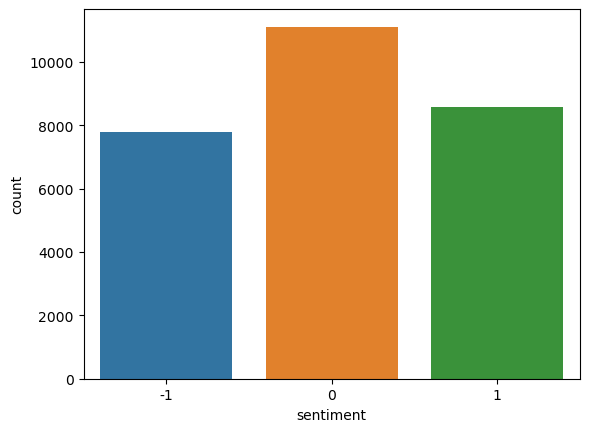

In [ ]:
sns.countplot(x='sentiment',data=df)

# TEXT PREPROCESSING

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from collections import Counter

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shahr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shahr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# converting text to lowercase and removing links, punctuations etc.
def pre_process_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+|\[.*?\]|[^a-zA-Z\s]+|\w*\d\w*', '', text)

    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]

    return ' '.join(filtered_words).strip()

In [ ]:
df['preprocessed_text'] = df.text.apply(pre_process_text)

In [ ]:
df.head()

,sentiment,text,preprocessed_text
0,0,"I`d have responded, if I were going",id responded going
1,-1,Sooo SAD I will miss you here in San Diego!!!,sooo sad miss san diego
2,-1,my boss is bullying me...,boss bullying
3,-1,what interview! leave me alone,interview leave alone
4,-1,"Sons of ****, why couldn`t they put them on t...",sons couldnt put releases already bought


In [ ]:
# second we perform tokenization and stemmeing 

def stem_text(text):
    tokens = nltk.word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [ ]:
df['stemmed_text'] = df['preprocessed_text'].apply(stem_text)

In [ ]:
df.head()

,sentiment,text,preprocessed_text,stemmed_text
0,0,"I`d have responded, if I were going",id responded going,id respond go
1,-1,Sooo SAD I will miss you here in San Diego!!!,sooo sad miss san diego,sooo sad miss san diego
2,-1,my boss is bullying me...,boss bullying,boss bulli
3,-1,what interview! leave me alone,interview leave alone,interview leav alon
4,-1,"Sons of ****, why couldn`t they put them on t...",sons couldnt put releases already bought,son couldnt put releas alreadi bought


# EDA

In [ ]:
count = Counter(' '.join(df['stemmed_text']).split())

words = pd.DataFrame(count.items(),columns=['Words','Frequency'])

words = words.sort_values('Frequency',ascending = False).reset_index(drop=True)

words['rank'] = words.index + 1
words = words[['rank','Words','Frequency']]

In [ ]:
words.head()

,rank,Words,Frequency
0,1,im,3054
1,2,day,2413
2,3,go,2363
3,4,get,1909
4,5,good,1569


In [ ]:
from wordcloud import WordCloud

In [ ]:
def generate_wordcloud(i):
    cloud = WordCloud(width=2000,height=1000,max_words=1000,background_color='black',colormap='coolwarm')
    wordcloud = cloud.generate(i)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

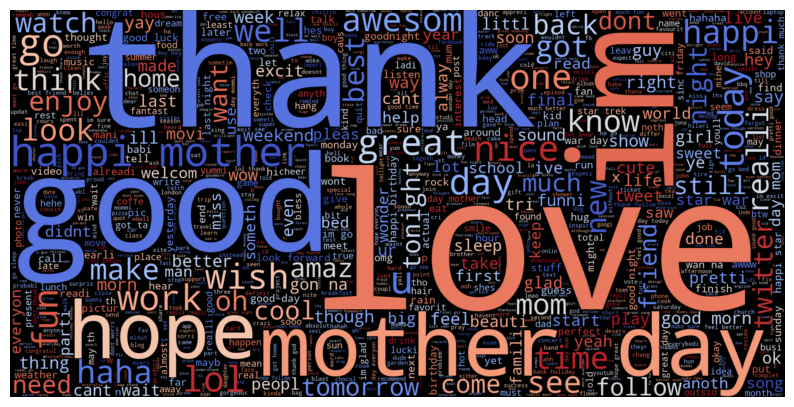

In [ ]:
positive_words = " ".join(df[df['sentiment']==1]['stemmed_text'])
generate_wordcloud(positive_words)

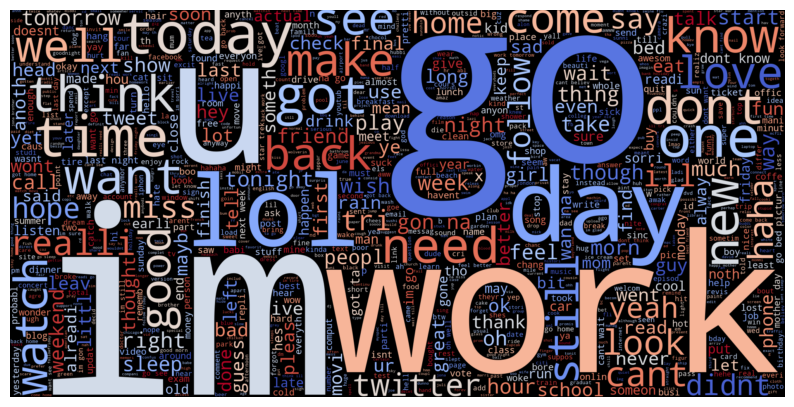

In [ ]:
neutral_words = " ".join(df[df['sentiment']==0]['stemmed_text'])
generate_wordcloud(neutral_words)

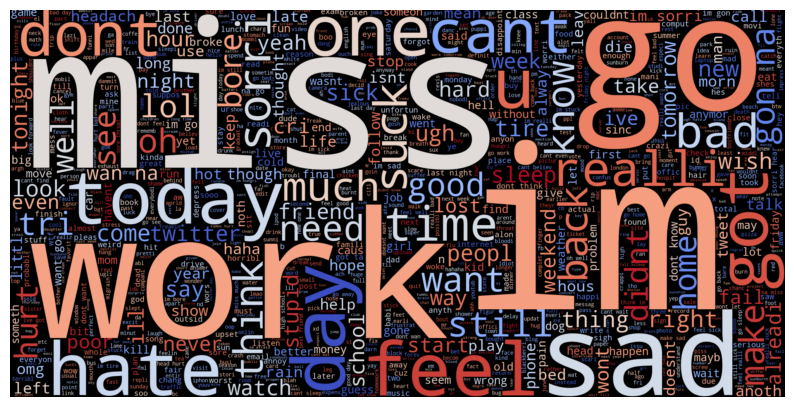

In [ ]:
negative_words = " ".join(df[df['sentiment']==-1]['stemmed_text'])
generate_wordcloud(negative_words)

## TFIDF feature extraction

In [ ]:
X = df.stemmed_text
y = df.sentiment

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [ ]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# CREATING MODELS

In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
x_train,x_test,Y_train,Y_test = train_test_split(X,y_encoded,random_state=42,test_size=0.2)
xgb_classifier = xgb.XGBClassifier()
x_train_vector = tfidf.fit_transform(x_train)
x_test_vector = tfidf.transform(x_test)

xgb_classifier.fit(x_train_vector,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train_tfidf,y_train)

LogisticRegression()

In [ ]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
def report(model):
    preds = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test,preds)
    print('accuracy:- ',acc)
    print(classification_report(y_test,preds))
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    

accuracy:-  0.6203383663816627
              precision    recall  f1-score   support

          -1       0.76      0.42      0.54      1562
           0       0.54      0.80      0.64      2230
           1       0.74      0.57      0.64      1705

    accuracy                           0.62      5497
   macro avg       0.68      0.60      0.61      5497
weighted avg       0.66      0.62      0.61      5497



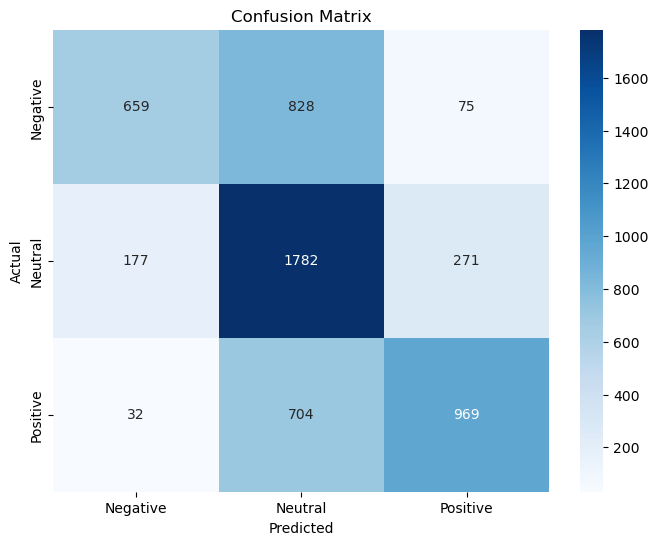

In [ ]:
# Multinomial NB evaluation
report(nb)

accuracy:-  0.6921957431326178
              precision    recall  f1-score   support

          -1       0.73      0.61      0.66      1562
           0       0.63      0.74      0.68      2230
           1       0.76      0.70      0.73      1705

    accuracy                           0.69      5497
   macro avg       0.71      0.68      0.69      5497
weighted avg       0.70      0.69      0.69      5497



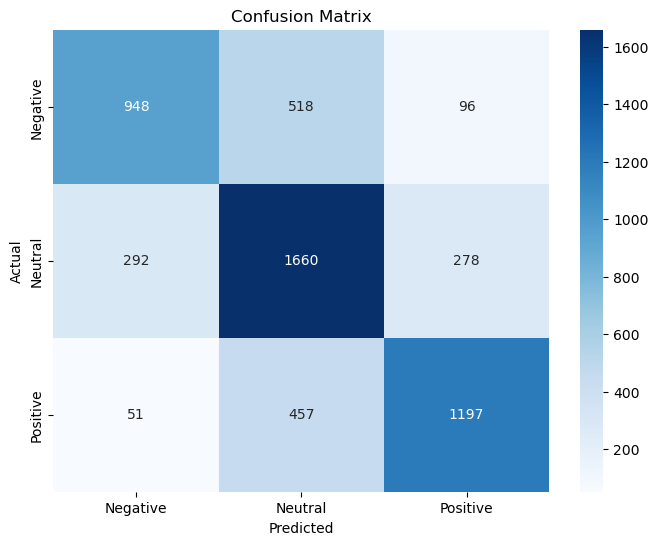

In [ ]:
# Logistic regression evaluation
report(log_model)

accuracy:-  0.6689103147171185
              precision    recall  f1-score   support

          -1       0.68      0.64      0.66      1562
           0       0.63      0.66      0.64      2230
           1       0.72      0.71      0.71      1705

    accuracy                           0.67      5497
   macro avg       0.67      0.67      0.67      5497
weighted avg       0.67      0.67      0.67      5497



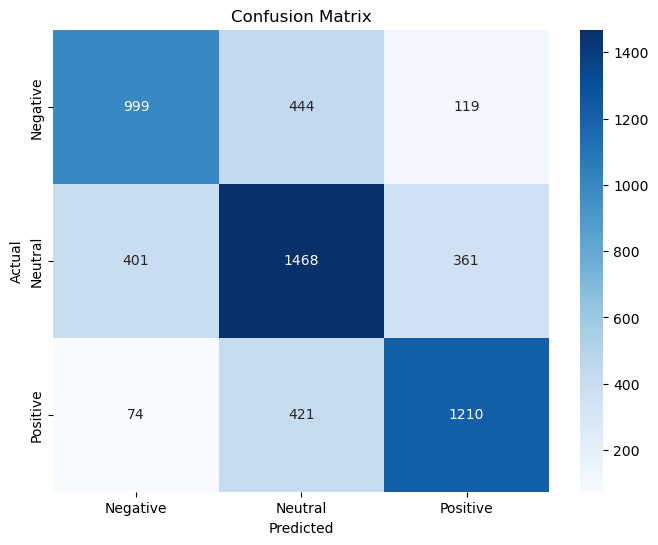

In [ ]:
# Linear SVC evaluation
report(linear_svc)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),
               ('svc',LinearSVC())])

In [ ]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [ ]:
accuracy_dic = {
    
    'model':['Naive_bayes','Logistic Regression','Linear SVC'],
    'accuracy':[62,69,66]
}

In [ ]:
acc_df = pd.DataFrame(accuracy_dic)

In [ ]:
acc_df

,model,accuracy
0,Naive_bayes,62
1,Logistic Regression,69
2,Linear SVC,66


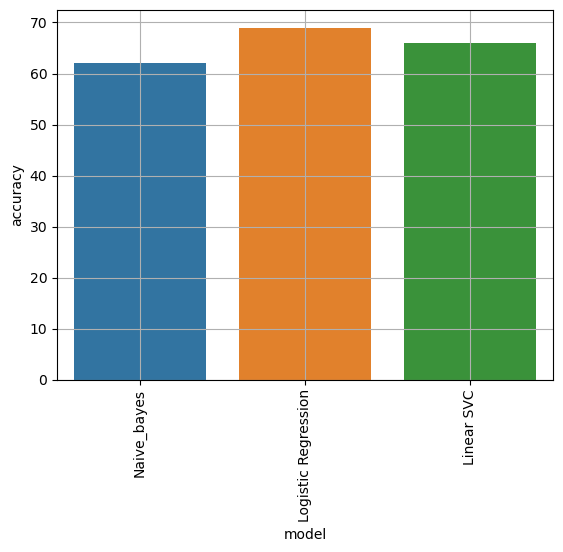

In [ ]:
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.xticks(rotation=90)  
plt.grid(True)

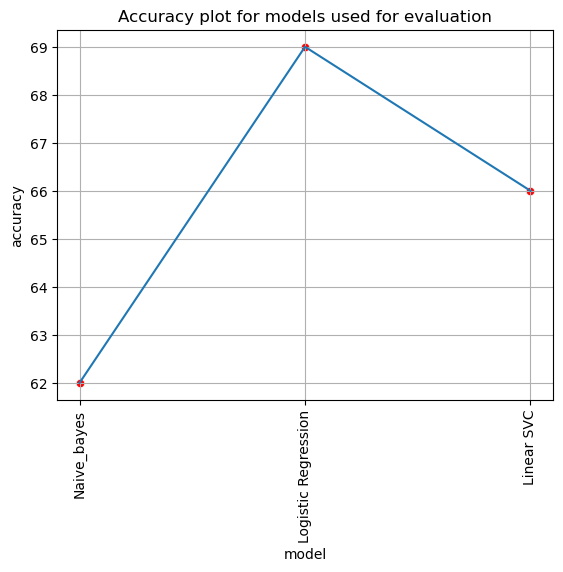

In [ ]:
sns.scatterplot(x='model',y='accuracy',data=acc_df,color='red')
sns.lineplot(x='model',y='accuracy',data=acc_df)
plt.title('Accuracy plot for models used for evaluation')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
test_df = pd.read_csv('C:/Users/shahr/OneDrive/Desktop/NEXUS INFO/dataset for project 3/test.csv', encoding='latin1')

In [ ]:
sentiment_mapping = {
    'neutral': 0,
    'negative':-1,
    'positive':1
}


test_df['sentiment'] = test_df['sentiment'].map(sentiment_mapping)

In [ ]:
test_df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,0.0,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,1.0,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",-1.0,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,1.0,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,1.0,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [ ]:
test_df=test_df[['sentiment', 'text']]

In [ ]:
test_df.head()

,sentiment,text
0,0.0,Last session of the day http://twitpic.com/67ezh
1,1.0,Shanghai is also really exciting (precisely -...
2,-1.0,"Recession hit Veronique Branquinho, she has to..."
3,1.0,happy bday!
4,1.0,http://twitpic.com/4w75p - I like it!!


In [ ]:
test_df.isna()

,sentiment,text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
4810,True,True
4811,True,True
4812,True,True
4813,True,True


In [ ]:
test_df = test_df.dropna(axis=0)

In [ ]:
test_df.isna().sum()

sentiment    0
text         0
dtype: int64

In [ ]:
test = test_df['text']

In [ ]:
pred = pipe.predict(test)

In [ ]:
pred

array([ 0,  0, -1, ...,  0,  1,  1], dtype=int64)

In [ ]:
test_acc = accuracy_score(pred,test_df.sentiment)
test_acc

0.5764006791171478

In [ ]:
pipe2 = Pipeline([('tfidf',TfidfVectorizer()),
               ('log',LogisticRegression())])

In [ ]:
pipe2.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('log', LogisticRegression())])

In [ ]:
log_pipe_pred = pipe2.predict(test)

In [ ]:
log_test_acc = accuracy_score(log_pipe_pred,test_df.sentiment)

In [ ]:
log_test_acc

0.6013016411997736

In [ ]:
pipe3 = Pipeline([('tfidf',TfidfVectorizer()),
               ('nb',MultinomialNB())])

In [ ]:
pipe3.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [ ]:
nb_pipe_pred = pipe3.predict(test)

In [ ]:
nb_test_acc = accuracy_score(nb_pipe_pred,test_df.sentiment)
nb_test_acc

0.553763440860215

In [ ]:
test_acc = {
    'model':['Naive_bayes', 'Logistic Regression','Linear SVC'],
    'accuracy': [55.37, 60.13, 57.64]
}

In [ ]:
test_acc_df = pd.DataFrame(test_acc)

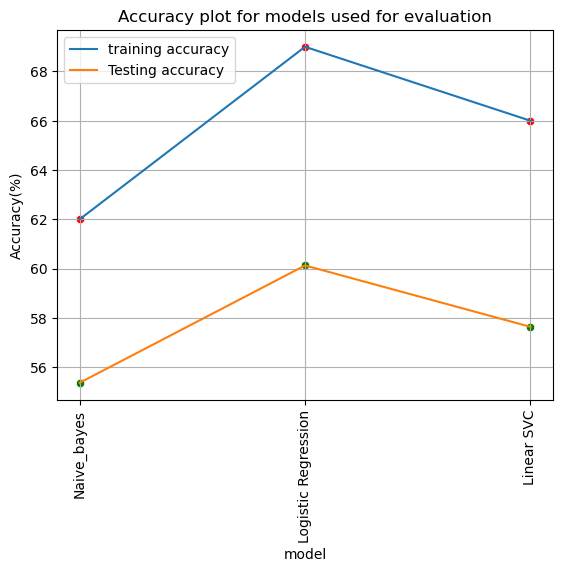

In [ ]:
sns.scatterplot(x='model',y='accuracy',data=acc_df,color='red')
sns.lineplot(x='model',y='accuracy',data=acc_df,label='training accuracy')
sns.scatterplot(x='model',y='accuracy',data=test_acc_df,color='green')
sns.lineplot(x='model',y='accuracy',data=test_acc_df,label='Testing accuracy')
plt.title('Accuracy plot for models used for evaluation')
plt.grid(True)
plt.ylabel('Accuracy(%)')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Hyperparameter Tuning

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])
parameters = {
    'tfidf__max_df': (0.5, 0.75, 1.0),
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'nb__alpha': (1e-2, 1e-3)
}
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train,y_train)
print("Best Parameters:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'nb__alpha': 0.01, 'tfidf__max_df': 0.5, 'tfidf__ngram_range': (1, 1)}
Classification Report:
              precision    recall  f1-score   support

          -1       0.62      0.52      0.57      1562
           0       0.55      0.65      0.59      2230
           1       0.65      0.58      0.61      1705

    accuracy                           0.59      5497
   macro avg       0.60      0.58      0.59      5497
weighted avg       0.60      0.59      0.59      5497



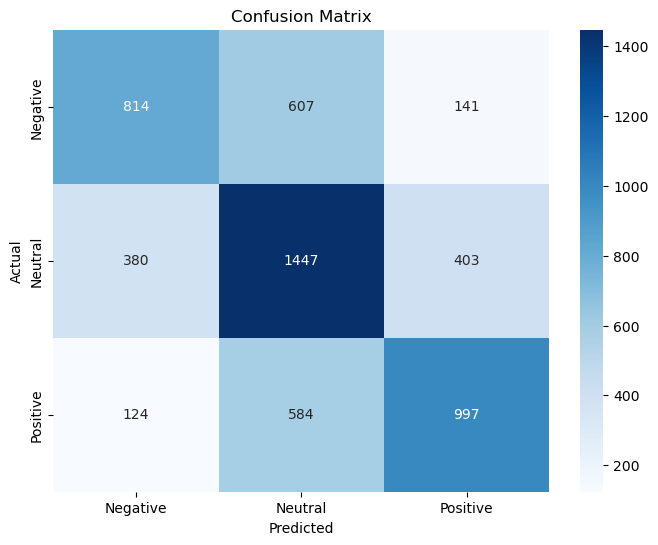

In [ ]:
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pickle
with open('C:/Users/shahr/OneDrive/Desktop/NEXUS INFO/Data-Science-Project-Series/Sentiment Analysis/model.pkl', 'wb') as model_file:
    pickle.dump(log_model, model_file)

In [ ]:
with open('C:/Users/shahr/OneDrive/Desktop/NEXUS INFO/Data-Science-Project-Series/Sentiment Analysis//vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)